# Create visualizations and geotiffs for drought multi-disturbances

In [1]:
import os
import earthpy as et
from os import path
import earthpy.plot as ep
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import rioxarray as rxr
import geopandas as gpd
import rasterio as rio
from rasterio.plot import plotting_extent
from tqdm import tqdm
import gc

home = path.join(et.io.HOME, "GitHub", "visualize-forest-disturbance")

forest_folder = path.join(home, "forest-disturbance-stack", "western-conus")

In [2]:
# drought_sum_path = path.join(home, "drought_sum.tif")
# with rio.open(drought_sum_path) as src:
#     print(src.dtypes)
# drought_sum = rxr.open_rasterio(drought_sum_path, masked=True).squeeze()
# drought_int = drought_sum.astype(np.int8)
drought_int_path = path.join(home, 'drought_stack.tif')
# drought_int.rio.to_raster(drought_int_path, dtype=np.int8)
with rio.open(drought_int_path) as src:
    print(src.dtypes)

('uint8',)


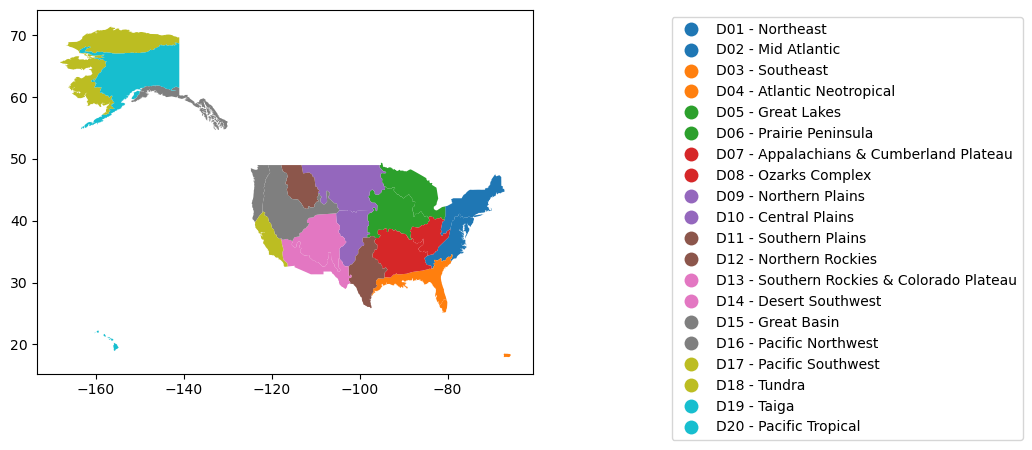

In [3]:
neon_domains = gpd.read_file(path.join(home, "neon-domains", "Polygons-polygon.shp"))
fig, ax = plt.subplots()
neon_domains.plot(column="Name", legend=True, ax=ax)
leg = ax.get_legend()
leg.set_bbox_to_anchor((2, 1))

<Axes: >

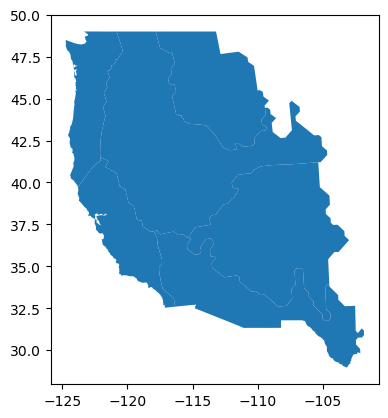

In [4]:
western_forests_domains = ['D12 - Northern Rockies', 
                           'D13 - Southern Rockies & Colorado Plateau', 
                           'D14 - Desert Southwest',
                           'D15 - Great Basin', 
                           'D16 - Pacific Northwest', 
                           'D17 - Pacific Southwest']

western_neon = neon_domains[neon_domains['Name'].isin(western_forests_domains)].clip([-130, 28.97026262, -101.84943552, 50])

western_neon.plot()

In [5]:
with rio.open(drought_int_path) as src:
    drought_crs = src.crs
    drought_array = src.read(1)
    drought_extent = plotting_extent(src)
    drought_meta = src.profile
    drought_transofrm = src.transform
    
drought_array[drought_array == 255] = 0

western_neon_reproj = western_neon.to_crs(drought_crs)

In [6]:
YlOrRd = mpl.colormaps['YlOrRd'].resampled(7)
newcolors = YlOrRd(np.linspace(0, 1, 7)) 
white = np.array([0, 0, 0, 0])
newcolors[:1, :] = white
groups = ["0", "1", "2", "3", "4", "5", "6+"]
classes=[0, 1, 2, 3, 4, 5, 6]
newcmp = ListedColormap(newcolors)

In [7]:
gc.collect()

80

In [8]:
YlOrRd_fso1 = mpl.colormaps['YlOrRd'].resampled(2)
newcolors_fso1 = YlOrRd_fso1(np.linspace(0, 1, 2))
white = np.array([0, 0, 0, 0])
newcolors_fso1[:1, :] = white
groups_fso1 = ["drought not present", "drought present"]
classes_fso1=[0, 1]
newcmp_fso1 = ListedColormap(newcolors_fso1)
drought_sum_over_1 = drought_array.copy()
drought_sum_over_1[drought_sum_over_1 > 0] = 1

In [9]:
drought_sum_over_1_area = (drought_sum_over_1.sum() * 30 * 30)/1000000
print("Total area that experienced one or more years of drought: {} sq km".format(drought_sum_over_1_area))

Total area that experienced one or more years of drought: 614570.6628 sq km


In [10]:
fig, ax = plt.subplots(figsize=(20, 20))

ep.plot_bands(drought_sum_over_1,
              ax=ax,
              extent=drought_extent, 
              cmap=newcmp_fso1, 
              cbar=False,
              scale=False)

ep.draw_legend(im_ax=ax.get_images()[0],
               classes=classes_fso1,
               titles=groups_fso1)

ax.annotate("Total area that experienced \none or more years of drought: {} sq km".format(drought_sum_over_1_area), xy=(-2356125.0, 701815.0), xycoords='data', size=20)

ax.set_title(label="Areas where drought was present in \nWestern US Forests 1999-2020", size=30)

western_neon_reproj.boundary.plot(ax=ax)

plt.savefig(os.path.join(home, "areawith1drought.png"))
plt.show()

In [11]:
drought_sum_over_2 = drought_array.copy()
drought_sum_over_2[drought_sum_over_2 <= 1] = 0
drought_sum_over_2[drought_sum_over_2 > 1] = 1
groups_fso2 = ["Less than 2 droughts present", "2 or more droughts present"]

In [12]:
drought_sum_over_2_area = (drought_sum_over_2.sum() * 30 * 30)/1000000
print("Total area that experienced two or more droughts: {} sq km".format(drought_sum_over_2_area))

Total area that experienced two or more droughts: 345224.9502 sq km


In [13]:
fig, ax = plt.subplots(figsize=(20, 20))

ep.plot_bands(drought_sum_over_2,
              ax=ax,
              extent=drought_extent, 
              cmap=newcmp_fso1,
              cbar=False,
              scale=False)

ep.draw_legend(im_ax=ax.get_images()[0],
               classes=classes_fso1,
               titles=groups_fso2)

ax.annotate("Total area that experienced \ntwo or more years of drought: {} sq km".format(drought_sum_over_2_area), xy=(-2356125.0, 701815.0), xycoords='data', size=20)

ax.set_title(label="Areas where 2+ years of drought were present in \nWestern US Forests 1999-2020", size=30)

western_neon_reproj.boundary.plot(ax=ax)

plt.savefig(os.path.join(home, "areaswith2droughts.png"))
plt.show()

In [14]:
drought_sum_over_3 = drought_array.copy()
drought_sum_over_3[drought_sum_over_3 <= 2] = 0
drought_sum_over_3[drought_sum_over_3 > 2] = 1
groups_fso3 = ["Less than 3 droughts present", "3 or more droughts present"]

In [15]:
drought_sum_over_3_area = (drought_sum_over_3.sum() * 30 * 30)/1000000
print("Total area that experienced two or more droughts: {} sq km".format(drought_sum_over_3_area))

Total area that experienced two or more droughts: 154890.1863 sq km


In [16]:
gc.collect()

0

In [17]:
fig, ax = plt.subplots(figsize=(20, 20))

ep.plot_bands(drought_sum_over_3,
              ax=ax,
              extent=drought_extent, 
              cmap=newcmp_fso1,
              cbar=False,
              scale=False)

ep.draw_legend(im_ax=ax.get_images()[0],
               classes=classes_fso1,
               titles=groups_fso3)

ax.set_title(label="Areas where 3+ years of drought were present in \nWestern US Forests 1999-2020", size=30)

ax.annotate("Total area that experienced \nthree or more years of drought: {} sq km".format(drought_sum_over_3_area), xy=(-2356125.0, 701815.0), xycoords='data', size=20)


western_neon_reproj.boundary.plot(ax=ax)

plt.savefig(os.path.join(home, "areaswith3droughts.png"))
plt.show()

In [18]:
with rio.open('drought_sum_over1.tif', 'w', **drought_meta) as dst:
    dst.write(drought_sum_over_1, 1)
with rio.open('drought_sum_over2.tif', 'w', **drought_meta) as dst:
    dst.write(drought_sum_over_2, 1)
with rio.open('drought_sum_over3.tif', 'w', **drought_meta) as dst:
    dst.write(drought_sum_over_3, 1)